LOAD LIBRARIES AND DATA

In [358]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
df=pd.read_csv('sample.csv')

HIRING RATE ACROSS CATEGORIES

In [359]:
def hiring_rate(src):
    df_hired=src.groupby('category').sum()[['hired']]
    df_hired.rename(columns={'category':'Category','hired':'Hired'},inplace=True)
    df_not_hired=src[src['hired']==0].groupby('category').count()[['hired']]
    df_not_hired.rename(columns={'category':'category','hired':'Not_Hired'},inplace=True)
    df_hiring_rate=pd.merge(df_hired,df_not_hired,on='category',how='inner')
    df_hiring_rate['Hiring_Percentage']=df_hiring_rate['Hired']/df_hiring_rate['Not_Hired']*100
    df_hiring_rate.reset_index(level=0, inplace=True)
    return df_hiring_rate

Text(0,0.5,'Hiring Rate')

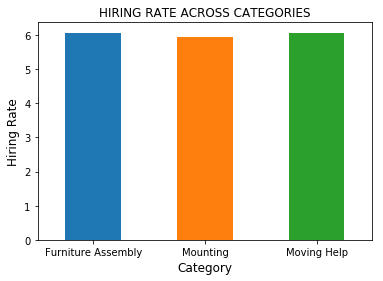

In [360]:
rate=hiring_rate(df)
ax = rate.plot.bar(x='category', y='Hiring_Percentage',title='HIRING RATE ACROSS CATEGORIES',rot=0,legend=False)
ax.set_xlabel("Category", fontsize=12)
ax.set_ylabel("Hiring Rate", fontsize=12)

FROM THE GRAPH ABOVE IT IS CLEAR THAT HIRING RATE IS PRETTY SIMILAR ACROSS CATEGORIES. THEREFORE WE DO HAVE SIMILAR DATA STRENGTH OF HIRED TASKERS ACROSS CATEGORIES TO CALCULATE DISTANCES.

Text(0,0.5,'Number of Hires')

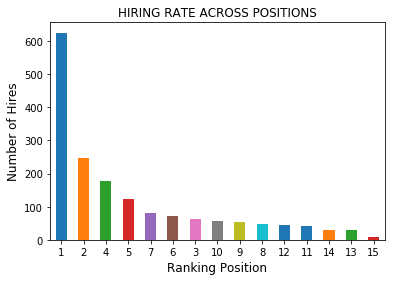

In [361]:
temp=df[df['hired']==1]
A=temp['position'].value_counts(dropna=False)
A = A.to_frame().reset_index()
A.rename(columns={'index':'Position','position':'Count'},inplace=True)
ax = A.plot.bar(x='Position', y='Count',title='HIRING RATE ACROSS POSITIONS',rot=0,legend=False)
ax.set_xlabel("Ranking Position", fontsize=12)
ax.set_ylabel("Number of Hires", fontsize=12)

FROM THE GRAPH ABOVE, IT IS CLEAR THAT TASKERS WHO APPEAR IN TOP OF THE RECOMMENDER LIST ARE HIRED THE MOST(1 to 7).
ONES FROM (8 TO 15) ARE HIRED THE LEAST. POSITION SEEMS TO PLAY A ROLE IN GETTING HIRED.

In [362]:
#FURNITURE ASSEMBLY CATEGORY - Recommended Hourly Rate

#Scale the features(Position,(Existing)hourly_rate,num_completed_tasks) before calculating distances
SS = StandardScaler()
df_FA = df[df['category']=='Furniture Assembly']
df_FA['Ranking_Position']=df_FA['position']
df_FA['Hourly_Rate_Charged']=df_FA['hourly_rate']
df_FA['Num_of_Tasks_Completed']=df_FA['num_completed_tasks']
df_FA[['position','hourly_rate','num_completed_tasks']] = SS.fit_transform(df_FA[['position','hourly_rate','num_completed_tasks']])
df_FA_not_hired=df_FA[df_FA['hired']==0]
df_FA_hired=df_FA[df_FA['hired']==1]
df_FA= None



#Calculate Average Euclidean distance of every 'Not Hired' Cohort across all of Hired Cohort.
def ndis(row):
    try:
        num_completed_tasks,hourly_rate,position=row['num_completed_tasks'],row['hourly_rate'],row['position']
        df_FA_hired['DIS']=((df_FA_hired.num_completed_tasks-num_completed_tasks)*(df_FA_hired.num_completed_tasks-num_completed_tasks)+(df_FA_hired.hourly_rate-hourly_rate)*(df_FA_hired.hourly_rate-hourly_rate)+(df_FA_hired.position-position)*(df_FA_hired.position-position))
        return df_FA_hired.DIS.mean()
    except:
        pass        
df_FA_not_hired['DIS']=df_FA_not_hired.apply(ndis, axis=1)


#Scale the Distance Score between 0 and 0.5 i.e., 0 being the least distance and 0.5 being the maxmimum distance
#Convert scaled euclidean distance to a similarity score using the formula [Similarity= 1-scaled(Euclidean_Distance)]
mms = MinMaxScaler(feature_range=(0, 0.5))
df_FA_not_hired[['DIS']] = mms.fit_transform(df_FA_not_hired[['DIS']])
df_FA_not_hired[['Similarity_Score']] = 1-df_FA_not_hired[['DIS']].astype(float) 


#Use the Similarity Score as an 'Adjustment Factor' to adjust the existing hourly rate and provide a recommended hourly rate
df_FA_not_hired['Recommended_Hourly_Rate'] = df_FA_not_hired['Hourly_Rate_Charged'].astype(float)*df_FA_not_hired['Similarity_Score'].astype(float)


#Dropped Extra Columns
df_FA_not_hired.drop(['position','hourly_rate','num_completed_tasks','DIS'], axis=1,inplace=True)
df_FA_hired.drop(['position','hourly_rate','num_completed_tasks','DIS'], axis=1,inplace=True)

df_FA=df_FA_not_hired.append(df_FA_hired)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#index

In [363]:
#MOUNTING CATEGORY - Recommended Hourly Rate

#Scale the features(Position,(Existing)hourly_rate,num_completed_tasks) before calculating distances
SS = StandardScaler()
df_MC = df[df['category']=='Mounting']
df_MC['Ranking_Position']=df_MC['position']
df_MC['Hourly_Rate_Charged']=df_MC['hourly_rate']
df_MC['Num_of_Tasks_Completed']=df_MC['num_completed_tasks']
df_MC[['position','hourly_rate','num_completed_tasks']] = SS.fit_transform(df_MC[['position','hourly_rate','num_completed_tasks']])
df_MC_not_hired=df_MC[df_MC['hired']==0]
df_MC_hired=df_MC[df_MC['hired']==1]
df_MC = None



#Calculate Average Euclidean distance of every 'Not Hired' Tasker across all of Hired Cohort.
def ndis(row):
    try:
        num_completed_tasks,hourly_rate,position=row['num_completed_tasks'],row['hourly_rate'],row['position']
        df_MC_hired['DIS']=((df_MC_hired.num_completed_tasks-num_completed_tasks)*(df_MC_hired.num_completed_tasks-num_completed_tasks)+(df_MC_hired.hourly_rate-hourly_rate)*(df_MC_hired.hourly_rate-hourly_rate)+(df_MC_hired.position-position)*(df_MC_hired.position-position))
        return df_MC_hired.DIS.mean()
    except:
        pass        
df_MC_not_hired['DIS']=df_MC_not_hired.apply(ndis, axis=1)


#Scale the Distance Score between 0 and 0.5 i.e., 0 being the least distance and 0.5 being the maxmimum distance
#Convert scaled euclidean distance to a similarity score using the formula [Similarity= 1-scaled(Euclidean_Distance)]
mms = MinMaxScaler(feature_range=(0, 0.5))
df_MC_not_hired[['DIS']] = mms.fit_transform(df_MC_not_hired[['DIS']])
df_MC_not_hired[['Similarity_Score']] = 1 - df_MC_not_hired[['DIS']].astype(float) 

#Assign Similarity Score of '1' to all 'Hired Taskers'
df_MC_hired['Similarity_Score']=1


#Use the Similarity Score as an 'Adjustment Factor' to adjust the existing hourly rate and provide a recommended hourly rate
df_MC_not_hired['Recommended_Hourly_Rate'] = df_MC_not_hired['Hourly_Rate_Charged'].astype(float)*df_MC_not_hired['Similarity_Score'].astype(float)

#For the Hired Cohort, the recommended hourly rate == Existing Hourly rate as the Similarity Score is '1'
df_MC_hired['Recommended_Hourly_Rate'] = df_MC_hired['Hourly_Rate_Charged'].astype(float)*df_MC_hired['Similarity_Score'].astype(float)


#Dropped Extra Columns
#df_MC_not_hired.drop(['position','hourly_rate','num_completed_tasks','DIS'], axis=1,inplace=True)
#df_MC_hired.drop(['position','hourly_rate','num_completed_tasks','DIS'], axis=1,inplace=True)

#df_MC=df_MC_not_hired.append(df_MC_hired)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#index

In [364]:
#MOVING HELP CATEGORY - Recommended Hourly Rate

#Scale the features(Position,(Existing)hourly_rate,num_completed_tasks) before calculating distances
SS = StandardScaler()
df_MH = df[df['category']=='Moving Help']
df_MH['Ranking_Position']=df_MH['position']
df_MH['Hourly_Rate_Charged']=df_MH['hourly_rate']
df_MH['Num_of_Tasks_Completed']=df_MH['num_completed_tasks']
df_MH[['position','hourly_rate','num_completed_tasks']] = SS.fit_transform(df_MH[['position','hourly_rate','num_completed_tasks']])
df_MH_not_hired=df_MH[df_MH['hired']==0]
df_MH_hired=df_MH[df_MH['hired']==1]
df_MH = None



#Calculate Average Euclidean distance of every 'Not Hired' Tasker across all of Hired Cohort.
def ndis(row):
    try:
        num_completed_tasks,hourly_rate,position=row['num_completed_tasks'],row['hourly_rate'],row['position']
        df_MH_hired['DIS']=((df_MH_hired.num_completed_tasks-num_completed_tasks)*(df_MH_hired.num_completed_tasks-num_completed_tasks)+(df_MH_hired.hourly_rate-hourly_rate)*(df_MH_hired.hourly_rate-hourly_rate)+(df_MH_hired.position-position)*(df_MH_hired.position-position))**0.5
        return df_MH_hired.DIS.mean()
    except:
        pass        
df_MH_not_hired['DIS']=df_MH_not_hired.apply(ndis, axis=1)




#Scale the Distance Score between 0 and 0.5 i.e., 0 being the least distance and 0.5 being the maxmimum distance
#Convert scaled euclidean distance to a similarity score using the formula [Similarity= 1-scaled(Euclidean_Distance)]
mms = MinMaxScaler(feature_range=(0, 0.5))
df_MH_not_hired[['DIS']] = mms.fit_transform(df_MH_not_hired[['DIS']])
df_MH_not_hired[['Similarity_Score']] = 1 - df_MH_not_hired[['DIS']].astype(float) 

#Assign Similarity Score of '1' to all 'Hired Taskers'
df_MH_hired['Similarity_Score']=1


#Use the Similarity Score as an 'Adjustment Factor' to adjust the existing hourly rate and provide a recommended hourly rate
df_MH_not_hired['Recommended_Hourly_Rate'] = df_MH_not_hired['Hourly_Rate_Charged'].astype(float)*df_MH_not_hired['Similarity_Score'].astype(float)

#For the Hired Cohort, the recommended hourly rate == Existing Hourly rate as the Similarity Score is '1'
df_MH_hired['Recommended_Hourly_Rate'] = df_MH_hired['Hourly_Rate_Charged'].astype(float)*df_MH_hired['Similarity_Score'].astype(float)


#Dropped Extra Columns
df_MH_not_hired.drop(['position','hourly_rate','num_completed_tasks','DIS'], axis=1,inplace=True)
df_MH_hired.drop(['position','hourly_rate','num_completed_tasks','DIS'], axis=1,inplace=True)

df_MH=df_MH_not_hired.append(df_MH_hired)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#index

In [365]:
del Result
Result = df_FA.append([df_MC, df_MH])
Result=Result[['tasker_id','recommendation_id','created_at','category','Hourly_Rate_Charged','Num_of_Tasks_Completed','Ranking_Position','Recommended_Hourly_Rate','Similarity_Score','hired']]

In [366]:
Result.head(500)

,tasker_id,recommendation_id,created_at,category,Hourly_Rate_Charged,Num_of_Tasks_Completed,Ranking_Position,Recommended_Hourly_Rate,Similarity_Score,hired
0,1.009185e+09,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:25,Furniture Assembly,38.0,151.0,1.0,37.958029,0.998896,0.0
1,1.006892e+09,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:25,Furniture Assembly,40.0,193.0,2.0,39.984317,0.999608,0.0
2,1.012024e+09,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:25,Furniture Assembly,28.0,0.0,3.0,27.913401,0.996907,0.0
3,1.009734e+09,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:25,Furniture Assembly,43.0,303.0,4.0,42.990202,0.999772,0.0
4,1.013579e+09,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:25,Furniture Assembly,29.0,39.0,5.0,28.928087,0.997520,0.0
5,1.012043e+09,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:25,Furniture Assembly,28.0,2.0,6.0,27.897041,0.996323,0.0
6,1.013471e+09,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:25,Furniture Assembly,29.0,9.0,7.0,28.881931,0.995929,0.0
7,1.009558e+09,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:25,Furniture Assembly,29.0,8.0,8.0,28.855213,0.995007,0.0
8,1.010801e+09,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:25,Furniture Assembly,28.0,0.0,9.0,27.820100,0.993575,0.0
9,1.009072e+09,0-0-70cf97d7-37af-4834-901c-ce3ad4893b8c,2017-09-01 00:32:25,Furniture Assembly,35.0,59.0,10.0,34.786464,0.993899,0.0
